In [48]:
#code to load all of the csvs in filepath to one pandas df
import pandas as pd
import os
import sys
filepath = "/DMS_ProteinGym_substitutions"
os.chdir(filepath)
files = os.listdir(filepath)
df = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        data['DMS_score'] = data['DMS_score'].astype(float)
        data['DMS_score'] = (data['DMS_score'] - data['DMS_score'].mean()) / data['DMS_score'].std()
        df = pd.concat([df, data], ignore_index=True)
        
df.head()


,mutant,mutated_sequence,DMS_score,DMS_score_bin,DMS_bin_score
0,A16C,MRKLSDELLIESYFKCTEMNLNRDFIELIENEIKRRSLGHIISV,1.232103,1,NaN
1,A16D,MRKLSDELLIESYFKDTEMNLNRDFIELIENEIKRRSLGHIISV,-0.127580,0,NaN
2,A16E,MRKLSDELLIESYFKETEMNLNRDFIELIENEIKRRSLGHIISV,0.949531,1,NaN
3,A16F,MRKLSDELLIESYFKFTEMNLNRDFIELIENEIKRRSLGHIISV,1.404415,1,NaN
4,A16G,MRKLSDELLIESYFKGTEMNLNRDFIELIENEIKRRSLGHIISV,0.872356,1,NaN


In [49]:
df.describe()

,DMS_score,DMS_score_bin,DMS_bin_score
count,2.465767e+06,2.465767e+06,4670.000000
mean,-3.856773e-17,5.646568e-01,0.500000
std,9.999562e-01,4.958020e-01,0.500054
min,-1.006512e+01,0.000000e+00,0.000000
25%,-8.742485e-01,0.000000e+00,0.000000
50%,6.697107e-02,1.000000e+00,0.500000
75%,8.001611e-01,1.000000e+00,1.000000
max,3.183003e+01,1.000000e+00,1.000000


<Axes: title={'center': 'DMS_score'}, xlabel='DMS_bin_score'>

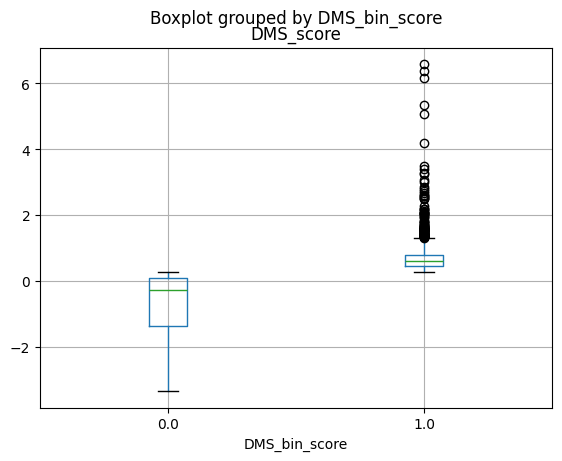

In [50]:
#box and whisker plot of DMS_score
import matplotlib.pyplot as plt
df.boxplot(column = 'DMS_score', by = 'DMS_bin_score')





array([[<Axes: title={'center': 'DMS_score'}>]], dtype=object)

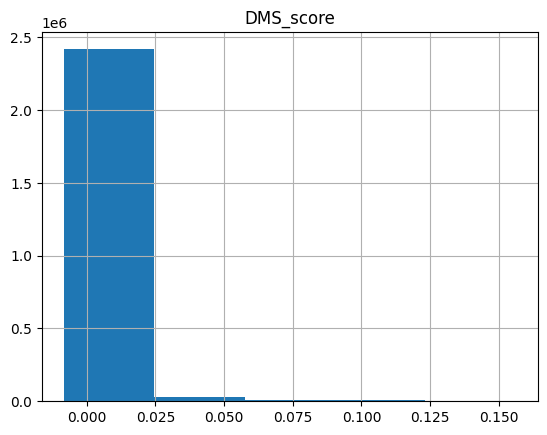

In [38]:
#histogram of Dms_score

df.hist(column='DMS_score', bins=5)


In [51]:
filepath = "/Clinical_ProteinGym_substitutions"
os.chdir(filepath)
files = os.listdir(filepath)
df = pd.DataFrame()
for file in files:
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        df = pd.concat([df, data], ignore_index=True)
        
df.head()


,Unnamed: 0,protein,protein_sequence,mutant,mutated_sequence,DMS_bin_score
0,43555,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R327Q,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Benign
1,43556,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,A277E,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
2,43557,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R275Q,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
3,43558,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,R275W,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Pathogenic
4,43559,NP_006205.1,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,G215S,MEQLRAAARLQIVLGHLGRPSAGAVVAHPTSGTISSASFHPQQFQY...,Benign


In [52]:
df.value_counts('DMS_bin_score')

DMS_bin_score
Pathogenic    32000
Benign        30727
Name: count, dtype: int64